In [3]:
import pandas as pd

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 106544.23


<IPython.core.display.Javascript object>


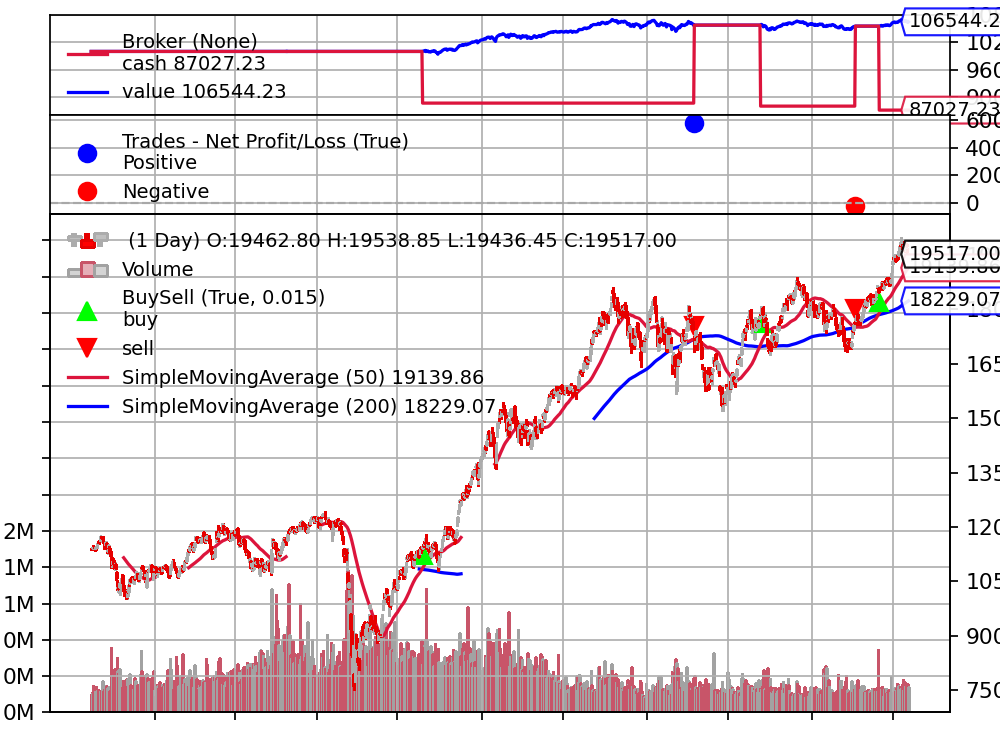

In [5]:
import backtrader as bt

class SimpleMovingAverageStrategy(bt.Strategy):
    params = (
        ('short_period', 50),
        ('long_period', 200),
    )

    def __init__(self):
        self.short_sma = bt.indicators.SimpleMovingAverage(
            self.data, period=self.params.short_period
        )
        self.long_sma = bt.indicators.SimpleMovingAverage(
            self.data, period=self.params.long_period
        )

    def next(self):
        if not self.position:  # No open position
            if self.short_sma[0] > self.long_sma[0] and self.short_sma[-1] <= self.long_sma[-1]:
                self.buy()

        elif self.short_sma[0] < self.long_sma[0] and self.short_sma[-1] >= self.long_sma[-1]:
            self.close()

if __name__ == '__main__':
    data = pd.read_csv('^NSEI.csv', index_col='Date', parse_dates=True)
    cerebro = bt.Cerebro()
    data_feed = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data_feed)
    cerebro.addstrategy(SimpleMovingAverageStrategy)
    cerebro.broker.set_cash(100000)
    cerebro.broker.setcommission(commission=0.001)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot(style='candlestick')